In [3]:
# =========================================
# Linear Regression Implementation
# =========================================

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
# Load and explore the dataset
df = pd.read_csv(r"D:\mydata\Elevate Labs\Housing.csv")
print("Dataset Shape:", df.shape)
print("Dataset Info:\n")
print(df.info())
print("\n Missing values:\n", df.isnull().sum())
print("\n Sample data:\n", df.head())


Dataset Shape: (545, 13)
Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

 Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
st

In [5]:
# Encode categorical variables (if any)
df = pd.get_dummies(df, drop_first=True)

# Define features (X) and target (y)
# Assuming the target column is 'price' — adjust if different in your dataset
y = df['price']
X = df.drop('price', axis=1)

# Split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")





 Model Evaluation:
Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.66
R² Score: 0.6529



 Coefficients:
                                   Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
parking                          2.248419e+05
mainroad_yes                     3.679199e+05
guestroom_yes                    2.316100e+05
basement_yes                     3.902512e+05
hotwaterheating_yes              6.846499e+05
airconditioning_yes              7.914267e+05
prefarea_yes                     6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05
Intercept: 260032.36


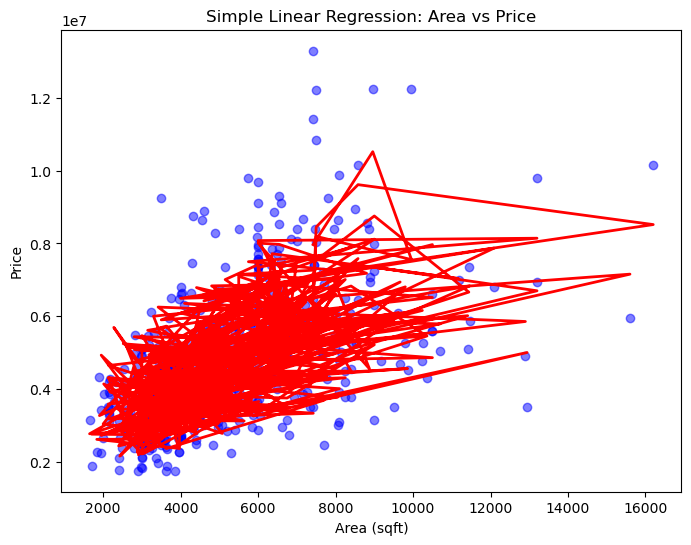

In [6]:
# Coefficients interpretation
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\n Coefficients:\n", coeff_df)
print(f"Intercept: {model.intercept_:.2f}")

# Plot regression line for Simple Regression (Example: area vs price)
# Only meaningful if one numerical predictor like 'area' exists
if 'area' in df.columns:
    plt.figure(figsize=(8,6))
    plt.scatter(df['area'], df['price'], color='blue', alpha=0.5)
    plt.plot(df['area'], model.predict(df.drop('price', axis=1)), color='red', linewidth=2)
    plt.title("Simple Linear Regression: Area vs Price")
    plt.xlabel("Area (sqft)")
    plt.ylabel("Price")
    plt.show()